
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
import zipfile
import pandas as pd
import os

# === Step 1: Unzip the dataset ===
# Okay, so first I'm gonna unzip the file I downloaded from Kaggle.
# This will put the CSV into a folder called "unzipped_data"
zip_path = r"C:\Users\loren\OneDrive\Desktop\Source Code for AD5933\archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

# === Step 2: See what's inside ===
# Just checking what files actually came out of the zip so I know what to load
files = os.listdir("unzipped_data")
print("Extracted files:", files)

# === Step 3: Grab the CSV file ===
# I’m assuming there’s only one file in there and that it's the dataset I want
# If there's more than one, I can just pick the one I need later
csv_file = files[0]
csv_path = os.path.join("unzipped_data", csv_file)

# === Step 4: Load the data ===
# Now I'm loading the CSV file into a pandas DataFrame so I can start playing with it
df = pd.read_csv(csv_path)

# === Step 5: Preview it ===
# Just printing the first few rows to see what this data even looks like
print(df.head())


Extracted files: ['student_depression_dataset.csv']
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  '

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

In [12]:
# === Just checking the structure again real quick ===
# I already saw a preview with df.head() earlier,
# but I want to really understand what's in here.

print("\nBasic info about the dataset:")
print(df.info())  # This shows me the types of data in each column

# === Now checking for missing values ===
# I want to see which columns are incomplete so I can figure out what to do
print("\nMissing values in each column:")
print(df.isnull().sum())



Basic info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         

In [14]:
from sklearn.preprocessing import LabelEncoder

# === Step 1: Convert 'Sleep Duration' from object to float ===
# I noticed this was stored as a string. I want it to be a number.
# If there's anything weird (like '5 hours' or '6.0'), I'll try to fix that later.
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

# Double check how many got turned into NaN (if any)
print("Sleep Duration nulls after conversion:", df['Sleep Duration'].isnull().sum())

# === Step 2: Label Encode Yes/No and Binary Columns ===
# I’m converting yes/no type answers to 0 and 1 because models can’t read words.
# Also encoding Gender (Male = 0, Female = 1) for now.

label_cols = [
    'Gender',
    'Have you ever had suicidal thoughts ?',
    'Financial Stress',
    'Family History of Mental Illness'
]

# Set up label encoder
le = LabelEncoder()

# Loop through and apply it to each column
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# === Step 3: One-hot encode multiclass text columns ===
# I don’t want to label-encode things like City or Degree,
# because the model might think higher numbers mean "more" or "better" cities.
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree'], drop_first=True)

# === Step 4: Quick check ===
# Just making sure things look okay after the transformation
print("\nData types after cleaning:")
print(df.dtypes)

print("\nPreview after encoding:")
print(df.head())


Sleep Duration nulls after conversion: 27901

Data types after cleaning:
id                     int64
Gender                 int64
Age                  float64
Academic Pressure    float64
Work Pressure        float64
                      ...   
Degree_ME               bool
Degree_MHM              bool
Degree_MSc              bool
Degree_Others           bool
Degree_PhD              bool
Length: 106, dtype: object

Preview after encoding:
   id  Gender   Age  Academic Pressure  Work Pressure  CGPA  \
0   2       1  33.0                5.0            0.0  8.97   
1   8       0  24.0                2.0            0.0  5.90   
2  26       1  31.0                3.0            0.0  7.03   
3  30       0  28.0                3.0            0.0  5.59   
4  32       0  25.0                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration Dietary Habits  ...  \
0                 2.0               0.0             NaN        Healthy  ...   
1                 5

------------------------------------------------------------------------------------------------------------------------------------------------

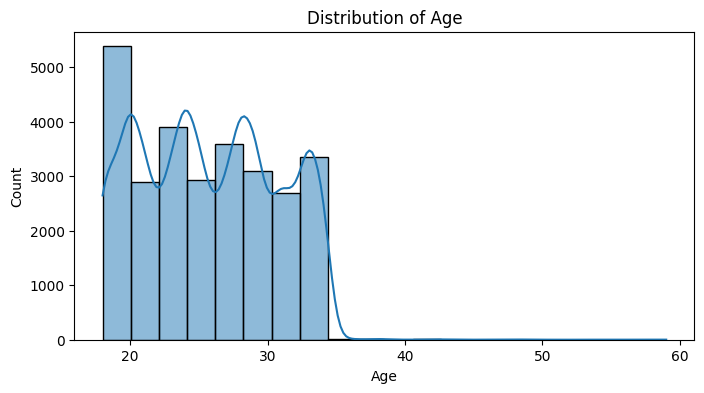

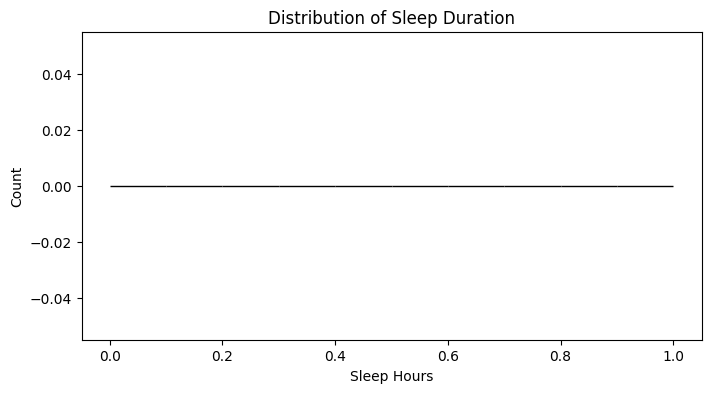

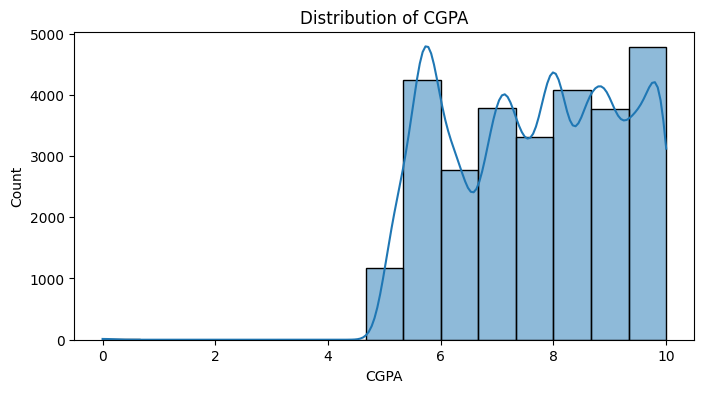

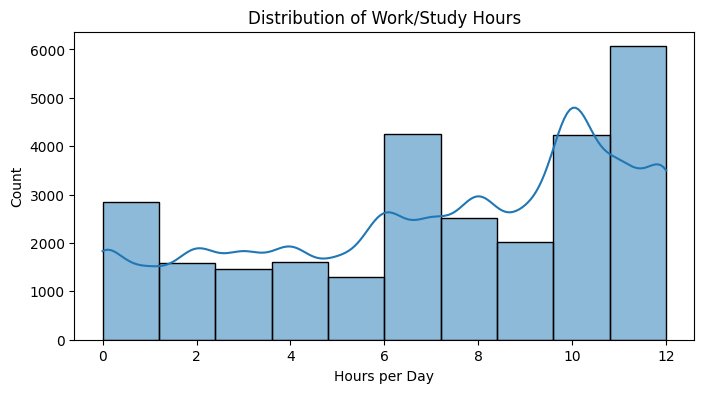

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Most students are between 20 and 30 years old.

# Histogram of Sleep Duration
plt.figure(figsize=(8, 4))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.show()
# Most students sleep between 5 to 6 hours per night.

# Histogram of CGPA
plt.figure(figsize=(8, 4))
sns.histplot(df['CGPA'], bins=15, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()
# CGPA values are mostly between 5.0 and 9.0, with a peak around 6–7.

# Histogram of Work/Study Hours
plt.figure(figsize=(8, 4))
sns.histplot(df['Work/Study Hours'], bins=10, kde=True)
plt.title('Distribution of Work/Study Hours')
plt.xlabel('Hours per Day')
plt.ylabel('Count')
plt.show()
# Most students work or study around 3 to 6 hours per day.


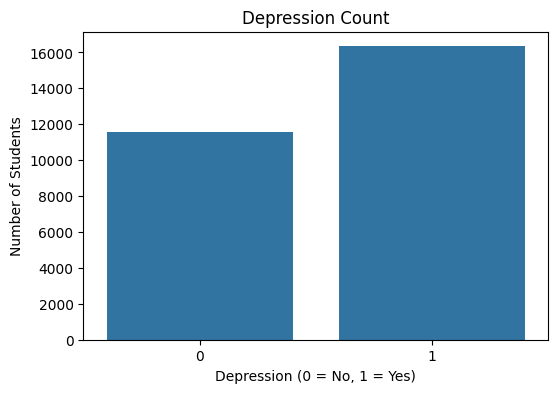

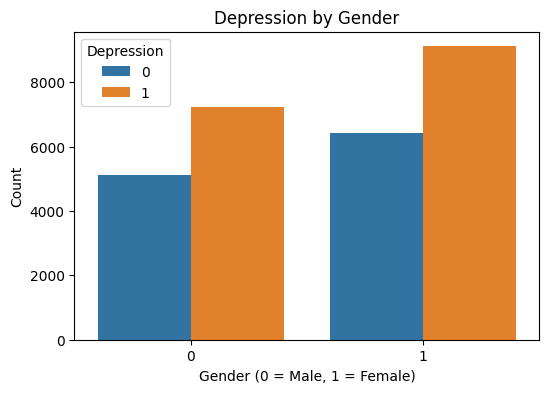

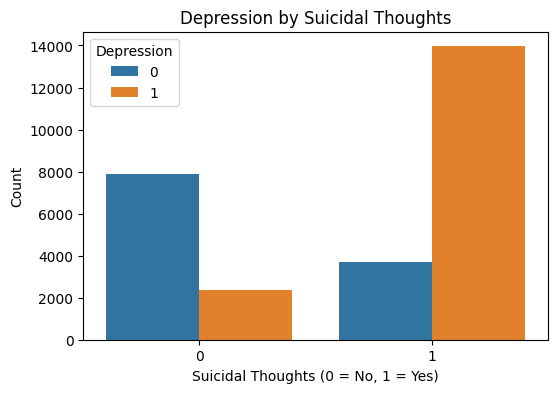

In [16]:
# Countplot: Depression distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df)
plt.title('Depression Count')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.show()
# More students reported no depression than those who did.

# Countplot: Gender vs Depression
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depression by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()
# Female students have a slightly higher count of reported depression.

# Countplot: Suicidal Thoughts vs Depression
plt.figure(figsize=(6, 4))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)
plt.title('Depression by Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
# Students who reported suicidal thoughts have a higher rate of depression.


c:\Users\loren\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\loren\AppData\Local\Temp\ipykernel_31552\2758087960.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Duration'].fillna(df['Sleep Duration'].median(), inplace=True)


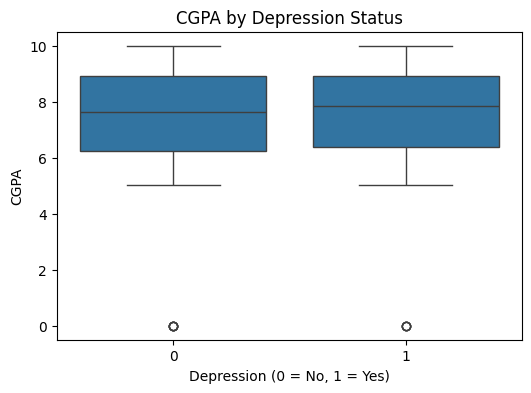

ValueError: List of boxplot statistics and `positions` values must have same the length

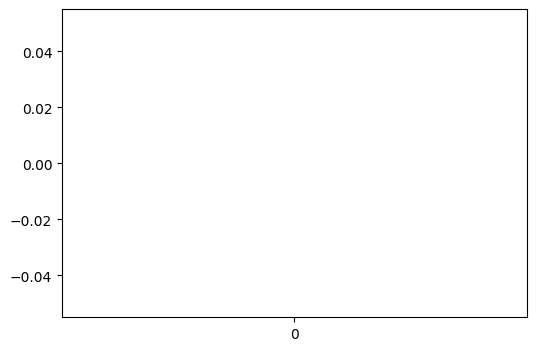

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Fix Sleep Duration ===

# Step 1: Clean stray quotes and whitespace
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.replace("'", "").str.strip()

# Step 2: Map text to numeric estimates
sleep_map = {
    'Less than 5 hours': 4.5,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9.0
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

# Step 3: Fill any missing values with the median
df['Sleep Duration'].fillna(df['Sleep Duration'].median(), inplace=True)

# === Boxplot: CGPA vs Depression ===
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('CGPA by Depression Status')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('CGPA')
plt.show()
# Students with depression tend to have slightly lower CGPA on average.

# === Boxplot: Sleep Duration vs Depression ===
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Depression Status')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Sleep Hours')
plt.show()
# Depressed students tend to sleep less compared to non-depressed students.

# === Boxplot: Work/Study Hours vs Depression ===
plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Work/Study Hours by Depression Status')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Hours per Day')
plt.show()
# Students with more study/work hours show a slightly higher depression rate.

# === Heatmap: Correlation matrix ===
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
# Depression is positively correlated with suicidal thoughts, academic pressure, and financial stress.
# Depression is negatively correlated with CGPA and sleep duration.


*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# making sure 'Dietary Habits' is not a string column anymore
# this converts it to dummy variables so the model doesn't crash
if 'Dietary Habits' in df.columns:
    df = pd.get_dummies(df, columns=['Dietary Habits'], drop_first=True)

# separating the target from the rest of the data
# 'Depression' is what I'm trying to predict, and 'id' isn’t useful here
X = df.drop(['Depression', 'id'], axis=1)
y = df['Depression']

# splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the decision tree and fitting it to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# running predictions on the test set
y_pred = model.predict(X_test)

# rounding predictions to 0 or 1 since depression is binary
y_pred_rounded = [round(p) for p in y_pred]

# checking how good the model is using R² and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_rounded)

print("Model 1 — All Features")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 3))


Model 1 — All Features
R² Score: 0.041
MAE: 0.233


In [23]:
# === Model 2: take out CGPA ===
# I want to see if GPA actually helps the model or not
X2 = df.drop(['Depression', 'id', 'CGPA'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
y_pred2 = [round(p) for p in y_pred2]

print("\nModel 2 — CGPA removed")
print("R²:", round(r2_score(y_test2, y_pred2), 3))
print("MAE:", round(mean_absolute_error(y_test2, y_pred2), 3))


# === Model 3: drop Sleep Duration ===
# Checking how important sleep is to prediction
X3 = df.drop(['Depression', 'id', 'Sleep Duration'], axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
y_pred3 = [round(p) for p in y_pred3]

print("\nModel 3 — Sleep Duration removed")
print("R²:", round(r2_score(y_test3, y_pred3), 3))
print("MAE:", round(mean_absolute_error(y_test3, y_pred3), 3))


# === Model 4: drop both satisfaction columns ===
# Testing if study/job satisfaction adds anything
X4 = df.drop(['Depression', 'id', 'Study Satisfaction', 'Job Satisfaction'], axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2, random_state=42)

model4 = DecisionTreeRegressor(random_state=42)
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
y_pred4 = [round(p) for p in y_pred4]

print("\nModel 4 — Satisfaction columns removed")
print("R²:", round(r2_score(y_test4, y_pred4), 3))
print("MAE:", round(mean_absolute_error(y_test4, y_pred4), 3))


# === Model 5: drop all stress-related features ===
# Seeing how much pressure and stress actually help the prediction
X5 = df.drop(['Depression', 'id', 'Academic Pressure', 'Work Pressure', 'Financial Stress'], axis=1)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.2, random_state=42)

model5 = DecisionTreeRegressor(random_state=42)
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)
y_pred5 = [round(p) for p in y_pred5]

print("\nModel 5 — Stress-related features removed")
print("R²:", round(r2_score(y_test5, y_pred5), 3))
print("MAE:", round(mean_absolute_error(y_test5, y_pred5), 3))



Model 2 — CGPA removed
R²: 0.036
MAE: 0.235

Model 3 — Sleep Duration removed
R²: 0.061
MAE: 0.229

Model 4 — Satisfaction columns removed
R²: 0.044
MAE: 0.233

Model 5 — Stress-related features removed
R²: -0.231
MAE: 0.3


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# I'm using the full feature set again (no drops)
X_base = df.drop(['Depression', 'id'], axis=1)
y_base = df['Depression']

# === Try different split sizes ===
split_settings = [0.1, 0.3, 0.4, 0.5]

for split in split_settings:
    X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=split, random_state=42)
    
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = [round(p) for p in y_pred]
    
    print(f"\nTrain/Test Split: {int((1-split)*100)}/{int(split*100)}")
    print("R²:", round(r2_score(y_test, y_pred), 3))
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))



Train/Test Split: 90/10
R²: 0.036
MAE: 0.233

Train/Test Split: 70/30
R²: 0.044
MAE: 0.233

Train/Test Split: 60/40
R²: 0.059
MAE: 0.229

Train/Test Split: 50/50
R²: 0.067
MAE: 0.227
